In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import util


#Downloading the Images:




---



| ![a](https://drive.google.com/uc?export=view&id=1nJRvwk81nsxwRn1OYKyyUEtwt8uNx_v6) 	| ![](https://drive.google.com/uc?export=view&id=1uKRux_pOLX2DCw008V7pqal6ssFiqtNB) 	|
|---	|---	|
| ![](https://drive.google.com/uc?export=view&id=1tRBjkMk5BbCufqR9ilIWU5wuMz2TInfj) 	| ![](https://drive.google.com/uc?export=view&id=13kwBVAyA5I8Cz0Ktw-Cuv0QQHogzQtSp) 	|

In [2]:
!gdown --id 1nJRvwk81nsxwRn1OYKyyUEtwt8uNx_v6
!gdown --id 1uKRux_pOLX2DCw008V7pqal6ssFiqtNB
!gdown --id 1tRBjkMk5BbCufqR9ilIWU5wuMz2TInfj
!gdown --id 13kwBVAyA5I8Cz0Ktw-Cuv0QQHogzQtSp

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nJRvwk81nsxwRn1OYKyyUEtwt8uNx_v6
To: /content/MRI_heart_SAX.jpg
100% 263k/263k [00:00<00:00, 6.25MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uKRux_pOLX2DCw008V7pqal6ssFiqtNB
To: /content/MRI_brain.jpg
100% 40.6k/40.6k [00:00<00:00, 51.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https:

# **SECTION 1 - Grey-level histogram-based segmentation**


Based on the image histogram, your goal is to segment all the structures related to bones present in the image. Be careful with the bone marrow / spinal cord areas (darker areas present within bones). Use two different threshold-based segmentation methods and compare the results (e.g. one mathematically defined, one based on user entry, one empirical/qualitative or even one you created).



![](https://drive.google.com/uc?export=view&id=13kwBVAyA5I8Cz0Ktw-Cuv0QQHogzQtSp)





---


Ref: https://encord.com/blog/image-thresholding-image-processing/

## 1A:  Show the software developed for the two segmentation methods

## 1B: Use your developed approaches on the image. Show the results

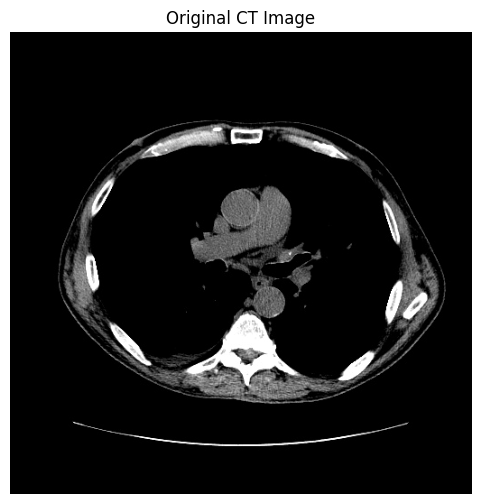

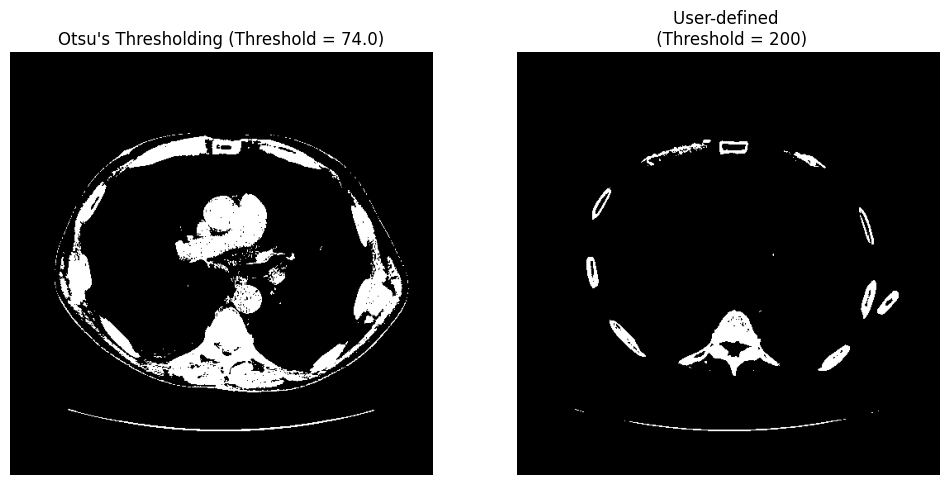

In [20]:
image_path = 'Axial_thoraxCT.jpg'
image_axial_thorax = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def threshold_segmentation(image,user_threshold):
  # Display the original image
  plt.figure(figsize=(6, 6))
  plt.imshow(image, cmap='gray')
  plt.title('Original CT Image')
  plt.axis('off')
  plt.show()


  # 1: Otsu's Thresholding
  otsu_value, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # 3: User-defined Thresholding after seeing histogram

  _, user_thresh = cv2.threshold(image, user_threshold, 255, cv2.THRESH_BINARY)


  # Display the results of both segmentation methods
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(otsu_thresh, cmap='gray')
  plt.title(f"Otsu's Thresholding (Threshold = {otsu_value})")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(user_thresh, cmap='gray')
  plt.title(f'User-defined \n (Threshold = {user_threshold})')
  plt.axis('off')


  plt.show()


threshold_segmentation(image_axial_thorax, user_threshold=200)

## 1C: How have you defined the best threshold value? Briefly explain the rationale for choosing certain parameters. Did one of the methods performed better than the other. Discuss the results.

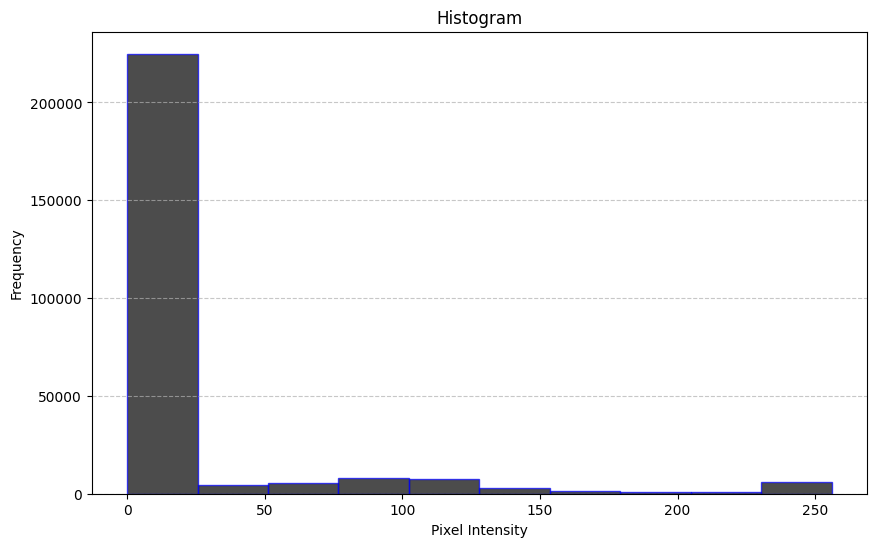

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(image_axial_thorax.ravel(), bins=10, range=[0, 256], color='black', alpha=0.7, edgecolor='blue')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 1D: Now explore how noise could affect the results. Artificially add a significant amount of Gaussian noise to the image. Re-trace your steps and attempt to segment the structures using the same parameters as before. Show the resulting images



## 1E: Has noise affected the outcome of both methods to the same extend? Which method (if any) was more robust? Briefly explain [<100 words]

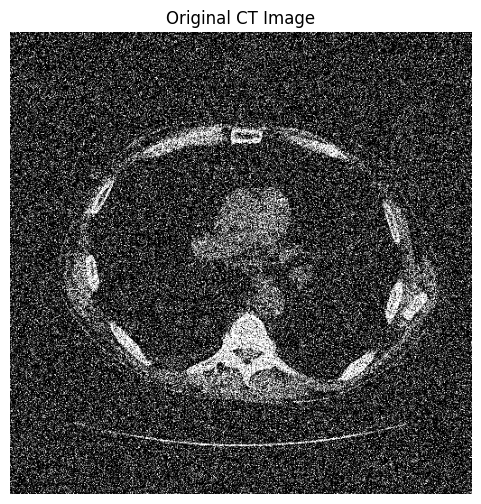

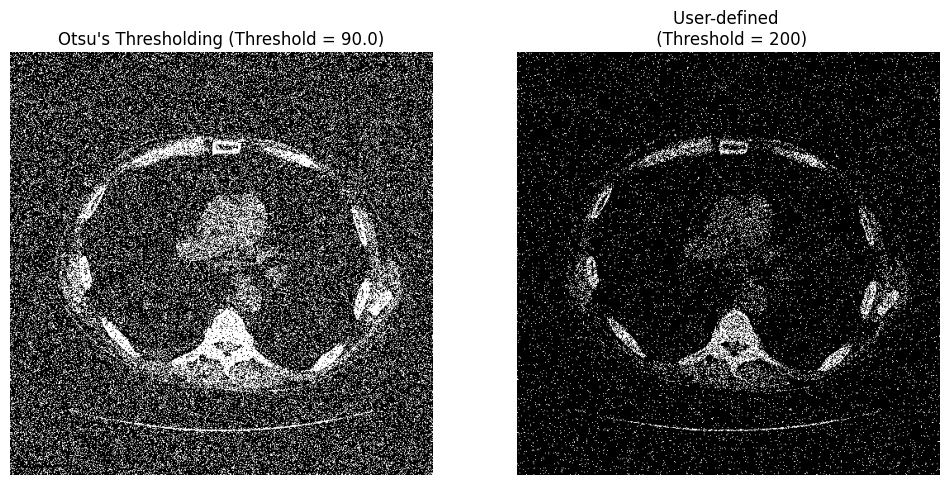

In [73]:

# Add gaussian noise
gaussian_noise_axial_thorax = util.random_noise(image_axial_thorax, mode='gaussian', var=0.2)
gaussian_noise_axial_thorax = (gaussian_noise_axial_thorax * 255).astype(np.uint8)

threshold_segmentation(gaussian_noise_axial_thorax,user_threshold=200)

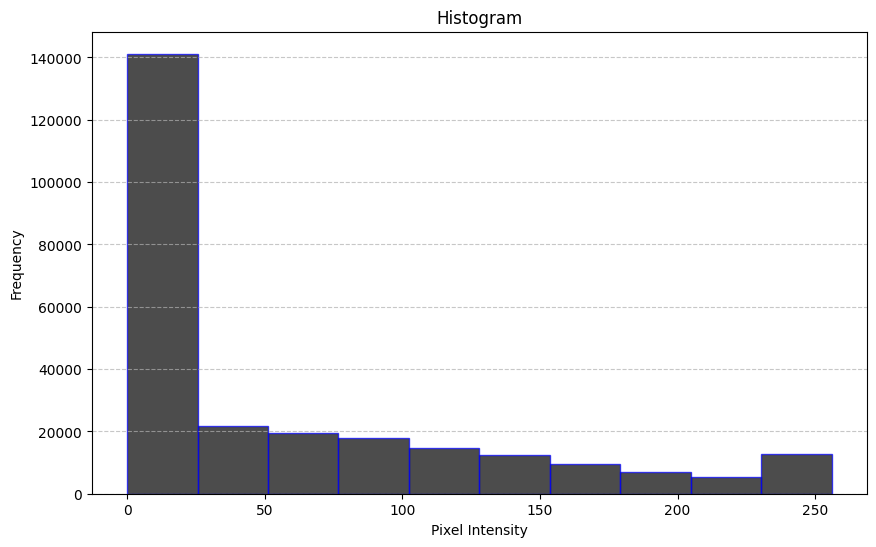

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(gaussian_noise_axial_thorax.ravel(), bins=10, range=[0, 256], color='black', alpha=0.7, edgecolor='blue')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **SECTION 2 – Segmentation with AI**

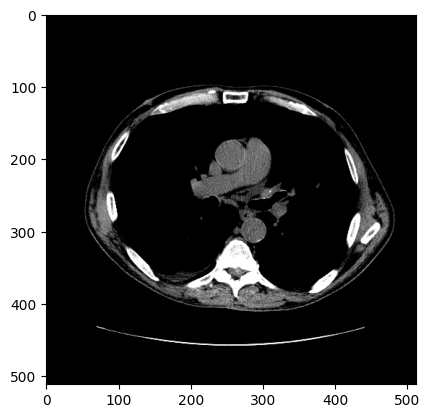

In [21]:

plt.imshow(image_axial_thorax, cmap='gray')

plt.show()


## 2A:  Include a screenshot of your question to the LLM and generated answer.

## 2D: Based on the code suggested by the LLM, modify it aiming to improve the output.

ChatGPT's generated code

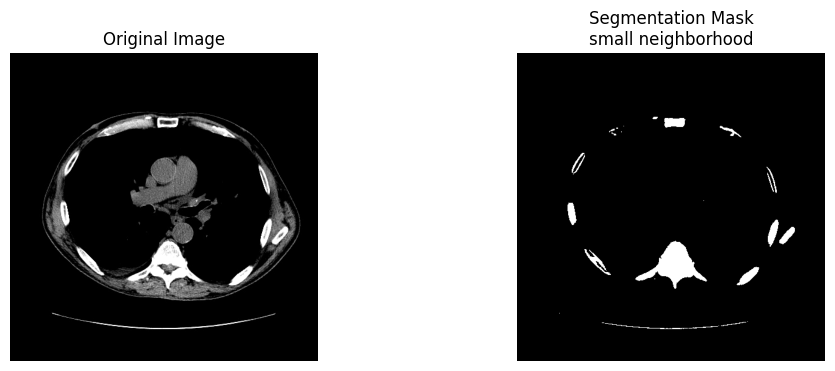

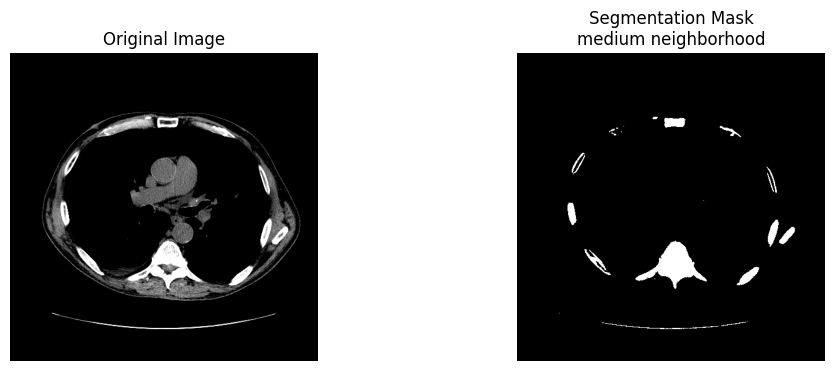

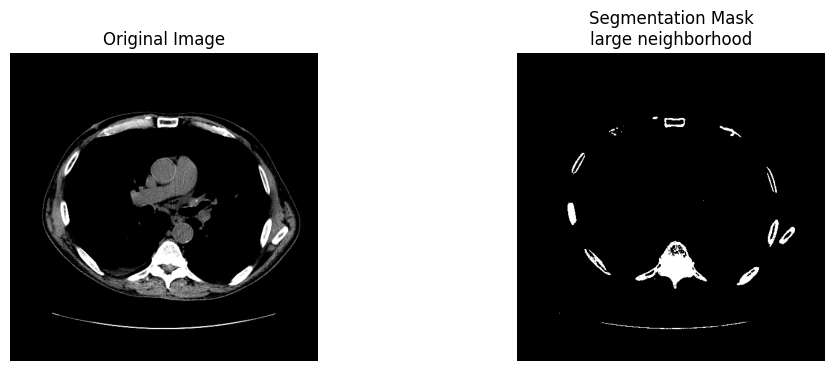

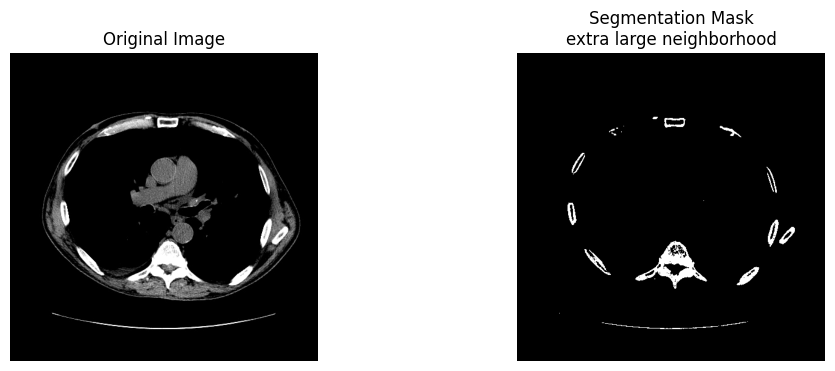

In [27]:
import numpy as np
from scipy.ndimage import generate_binary_structure
from collections import deque

def region_growing(image, seed_point, threshold, neighborhood):
    """
    Implements region growing algorithm on a grayscale image.

    Parameters:
    image: numpy.ndarray
        Input image (grayscale)
    seed_point: tuple
        Starting point coordinates (x, y)
    threshold: float
        Maximum absolute difference in pixel values to be considered similar

    Returns:
    numpy.ndarray
        Binary mask of the segmented region
    """

    # Ensure the image is in the correct format
    if len(image.shape) > 2:
        raise ValueError("Input image must be grayscale")

    # Create a mask to store the segmented region
    mask = np.zeros_like(image, dtype=np.bool_)

    # Get image dimensions
    height, width = image.shape

    # Validate seed point
    x, y = seed_point
    if not (0 <= x < width and 0 <= y < height):
        raise ValueError("Seed point outside image boundaries")

    # Get the seed point's intensity value
    seed_value = image[y, x]

    # Initialize queue with seed point
    queue = deque([(x, y)])
    mask[y, x] = True

    if neighborhood == 'small':
      # Define 4-connectivity neighborhood
      neighbors = [ (-1, 0),(0, -1),(0, 1),(1, 0) ]
    elif neighborhood == 'medium':
      # Define 8-connectivity neighborhood
      neighbors = [(-1, -1), (-1, 0), (-1, 1),
                  (0, -1),           (0, 1),
                  (1, -1),  (1, 0),  (1, 1)]
    elif neighborhood == 'large':
      # Define a 24-connectivity neighborhood
      neighbors = [
          (-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2),
          (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2),
          (0, -2),  (0, -1),          (0, 1),  (0, 2),
          (1, -2),  (1, -1), (1, 0),  (1, 1),  (1, 2),
          (2, -2),  (2, -1), (2, 0),  (2, 1),  (2, 2)
      ]
    elif neighborhood == 'extra large':
      # Define a 48-connectivity neighborhood
      neighbors = [
          (-3, -3), (-3, -2), (-3, -1), (-3, 0), (-3, 1), (-3, 2), (-3, 3),
          (-2, -3), (-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2), (-2, 3),
          (-1, -3), (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2), (-1, 3),
          (0, -3),  (0, -2),  (0, -1),           (0, 1),  (0, 2),  (0, 3),
          (1, -3),  (1, -2),  (1, -1), (1, 0),   (1, 1),  (1, 2),  (1, 3),
          (2, -3),  (2, -2),  (2, -1), (2, 0),   (2, 1),  (2, 2),  (2, 3),
          (3, -3),  (3, -2),  (3, -1), (3, 0),   (3, 1),  (3, 2),  (3, 3)
      ]
    else:
            # Defualt
      neighbors = [ (-1, 0),(0, -1),(0, 1),(1, 0) ]

    # Region growing
    while queue:
        current_x, current_y = queue.popleft()

        # Check all neighboring pixels
        for dx, dy in neighbors:
            next_x, next_y = current_x + dx, current_y + dy

            # Check if the neighbor is within image boundaries
            if not (0 <= next_x < width and 0 <= next_y < height):
                continue

            # Skip if pixel has already been processed
            if mask[next_y, next_x]:
                continue

            # Check if neighbor's intensity is within threshold
            if abs(image[next_y, next_x] - seed_value) <= threshold:
                mask[next_y, next_x] = True
                queue.append((next_x, next_y))

    return mask




# Set seed point and threshold
seed_point = (50, 50)  # Center of the image
threshold = 250

neighborhood = ['small', 'medium', 'large', 'extra large']

for n in neighborhood:
  # Apply region growing
  segmentation_mask  = region_growing(image_axial_thorax, seed_point, threshold, n)

  # You can use matplotlib to display the results

  import matplotlib.pyplot as plt

  plt.figure(figsize=(12, 4))
  plt.subplot(121)
  plt.imshow(image_axial_thorax, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(122)
  plt.imshow(segmentation_mask, cmap='binary')
  plt.title(f'Segmentation Mask\n{n} neighborhood')
  plt.axis('off')

plt.show()


## 2E: What changes did you make, and why? (3–4 sentences)

0.013820648193359375


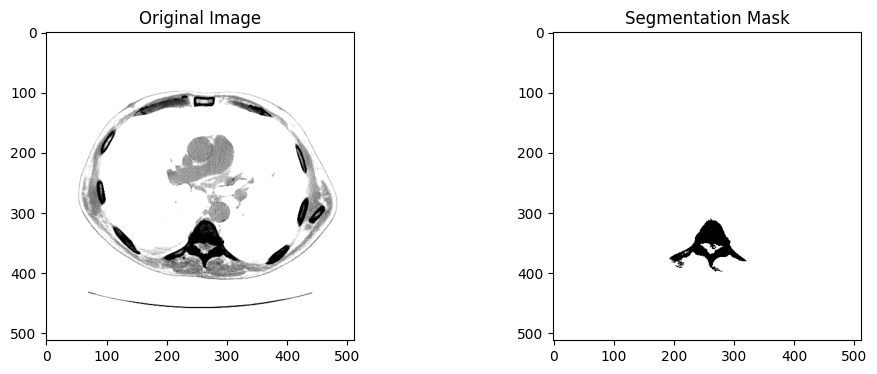

In [276]:
seed_point = (250,330)  # Center of the image
threshold = 120

# Apply region growing
segmentation_mask , perc = region_growing(rvrt, seed_point, threshold)


rvrt = (image_axial_thorax*-1)+255
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(rvrt, cmap='gray')
plt.title('Original Image Reverted')

plt.subplot(122)
plt.imshow(segmentation_mask, cmap='binary')
plt.title('Segmentation Mask')


plt.show()

segmentation_mask_rvt =  -1 * segmentation_mask + 255

## **SECTION 3 - 2D Segmentation**






## 3A: Use the developed segmentation approaches from section #2 on the provided MRI images.

In [334]:
mri_t1 = cv2.imread('MRI_brain.jpg', cv2.IMREAD_GRAYSCALE)
mri_t2 = cv2.imread('MRI_brain2.jpg', cv2.IMREAD_GRAYSCALE)

<ipython-input-278-481caef197b1>:66: RuntimeWarning: overflow encountered in scalar subtract
  if abs(image[next_y, next_x] - seed_value) <= threshold:


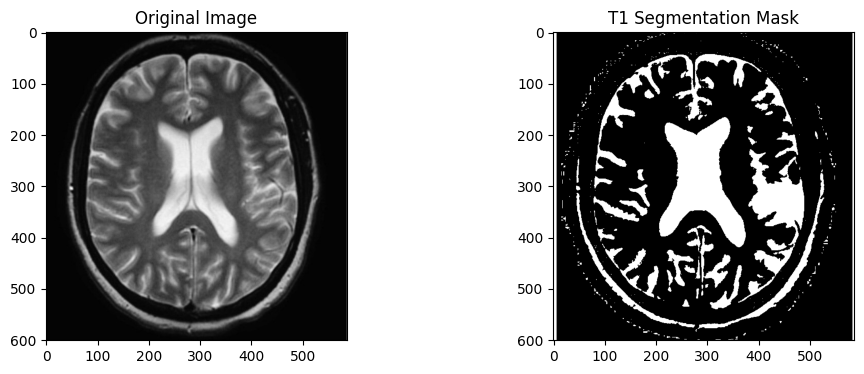

In [311]:

seed_point = (50, 50)
threshold = 100

segmentation_mask_t1 , perc = region_growing(mri_t1, seed_point, threshold)


plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(mri_t1, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(segmentation_mask_t1, cmap='binary')
plt.title('T1 Segmentation Mask')


plt.show()

<ipython-input-278-481caef197b1>:66: RuntimeWarning: overflow encountered in scalar subtract
  if abs(image[next_y, next_x] - seed_value) <= threshold:


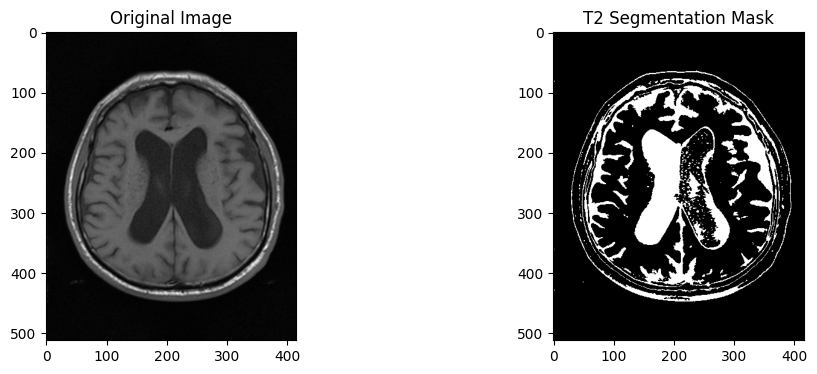

In [321]:
seed_point = (200, 400)
threshold = 220

segmentation_mask_t2 , perc = region_growing(mri_t2, seed_point, threshold)



plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(mri_t2, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(segmentation_mask_t2, cmap='binary')
plt.title('T2 Segmentation Mask')


plt.show()

## 3B: From your observations, which version of MRI images is more influenced by the initialization parameters of your chosen method (e.g. region growing seed, threshold value, gradient, etc)?

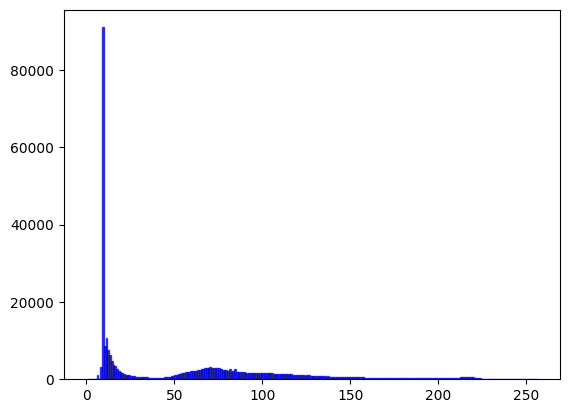

In [332]:
plt.hist(mri_t1.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7, edgecolor='blue')
plt.show()

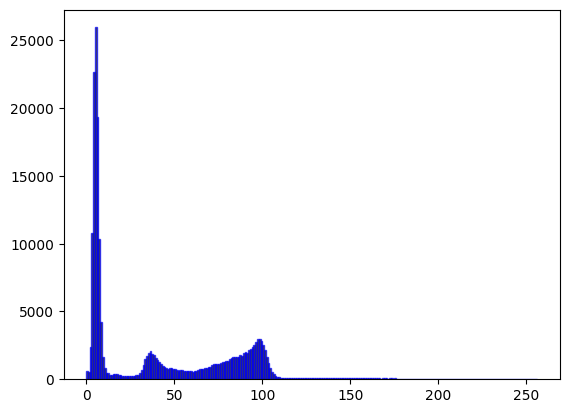

In [333]:
plt.hist(mri_t2.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7, edgecolor='blue')
plt.show()

# **SECTION 4 - 2D Segmentation Using Level Sets**

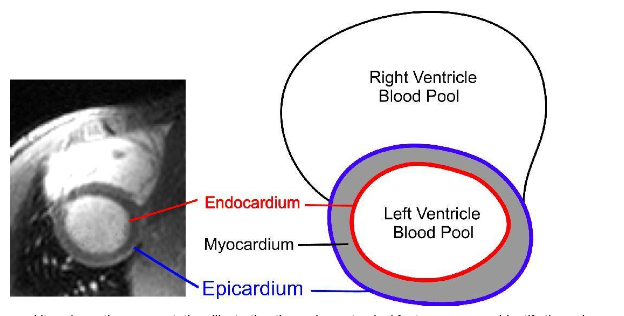


Figure 1 - MRI_heart_SAX.jpg image and its schematic representation, illustrating the main anatomical features one can identify through segmentation. Image source: O'Brien, S. (2011). Integrating Contour-Coupling with Spatio-Temporal Models in Multi-Dimensional Cardiac Image Segmentation (Doctoral dissertation, Dublin City University). Hu, Huaifei, et al. "Automatic segmentation of the left ventricle in cardiac MRI using local binary fitting model and dynamic programming techniques." PloS one 9.12 (2014): e114760.


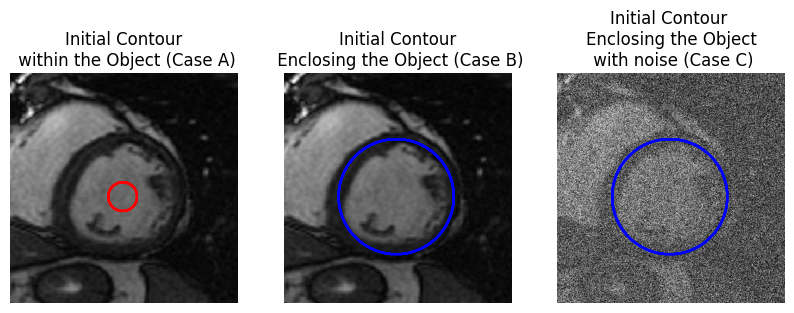

In [5]:
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.segmentation import chan_vese

image_axial_thorax = cv2.imread("MRI_heart_SAX.jpg", cv2.IMREAD_GRAYSCALE)

image_w , image_l = image_axial_thorax.shape
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

# Case A:
initial_contour_A = np.zeros((image_w , image_l), dtype=np.int8)
rr_a, cc_a = disk((image_w//2, image_l//2), 50)
initial_contour_A[rr_a+30, cc_a-5] = 1

# Case B:
initial_contour_B = np.zeros((image_w , image_l), dtype=np.int8)
rr_b, cc_b = disk((image_w//2 , image_l//2), 200)
initial_contour_B[rr_b+30, cc_b-5] = 1

# Case C:
# Add gaussian noise
noisy_image_axial_thorax = util.random_noise(image_axial_thorax, mode='gaussian', var=0.8)
noisy_image_axial_thorax = (noisy_image_axial_thorax * 255).astype(np.uint8)



ax[1].imshow(image_axial_thorax, cmap="gray")
ax[1].contour(initial_contour_B, colors='blue')
ax[1].set_title("Initial Contour\n Enclosing the Object (Case B)")
ax[1].axis('off')

ax[0].imshow(image_axial_thorax, cmap="gray")
ax[0].contour(initial_contour_A, colors='red')
ax[0].set_title("Initial Contour\n within the Object (Case A)")
ax[0].axis('off')

ax[2].imshow(noisy_image_axial_thorax, cmap="gray")
ax[2].contour(initial_contour_B, colors='blue')
ax[2].set_title("Initial Contour \nEnclosing the Object\n with noise (Case C)")
ax[2].axis('off')

plt.show()

## 4A: Show the results for the three cases (A,B,C) for the MRI image.

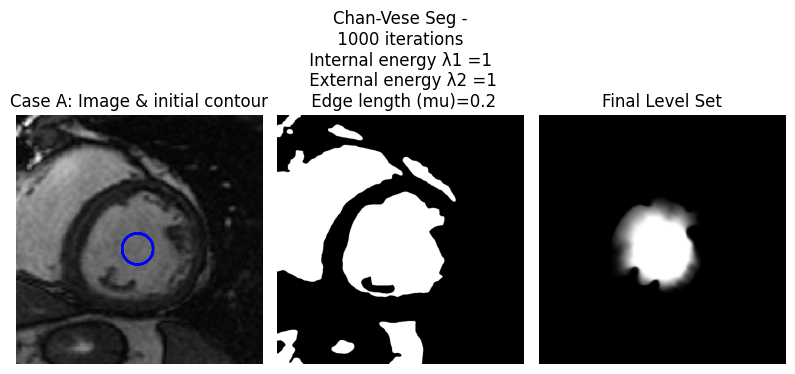

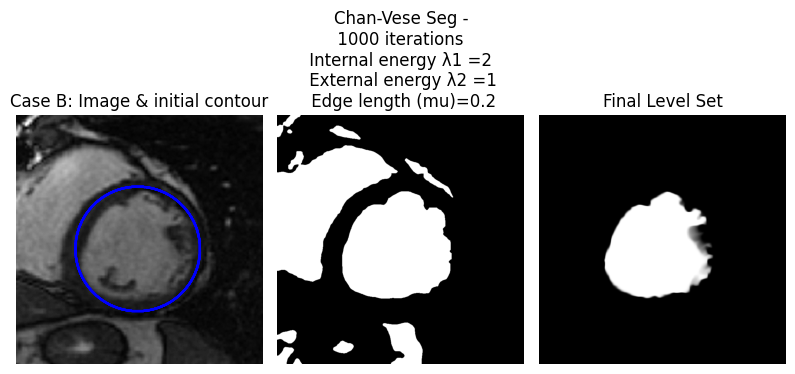

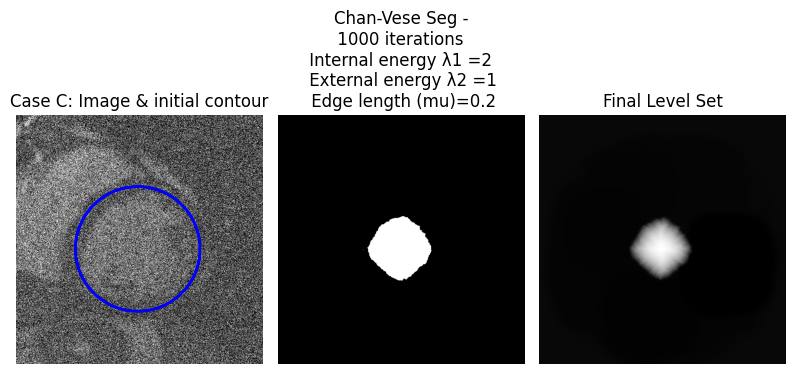

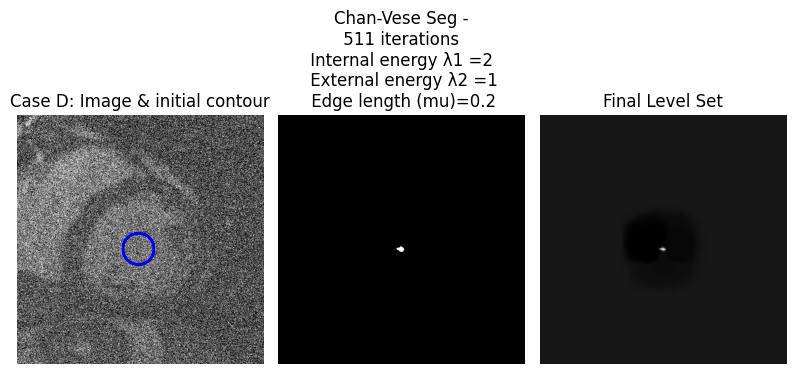

In [14]:

'''
mu :
  ‘edge length’ weight parameter. Higher mu values will produce a ‘round’ edge, while values closer to zero will detect smaller objects.

lambda1: (internal energy)
A higher lambda1 more emphasis on the intensity inside the contour

lambda2: (external energy)
A higher lambda2 more emphasis on maintaining in the region outside the contour.

'''

# Case     initial_contou  ,  img with/without noise, lambda1 and lambda2
Case_A = initial_contour_A , image_axial_thorax, "A", 1, 1
Case_B = initial_contour_B , image_axial_thorax, "B", 2, 1
Case_C = initial_contour_B , noisy_image_axial_thorax, "C", 2, 1
Case_D = initial_contour_A , noisy_image_axial_thorax, "D", 2, 1
Cases = [ Case_A, Case_B, Case_C, Case_D]



for case in Cases:
  initial_contour, image, idx, lambda1, lambda2 = case
  cv = chan_vese(
    image,
    mu=0.2,
    lambda1=lambda1,
    lambda2=lambda2,
    tol=1e-4,
    max_num_iter=1000,
    dt=0.1,
    init_level_set=initial_contour,
    extended_output=True,
  )


  fig, axes = plt.subplots(1, 3, figsize=(8, 8))
  ax = axes.flatten()

  ax[0].imshow(image, cmap="gray")
  ax[0].set_axis_off()
  ax[0].contour(initial_contour, colors='blue')
  ax[0].set_title(f"Case {idx}: Image & initial contour", fontsize=12)

  ax[1].imshow(cv[0], cmap="gray")
  ax[1].set_axis_off()
  title = f'Chan-Vese Seg -\n {len(cv[2])} iterations \n Internal energy λ1 ={lambda1} \n External energy λ2 ={lambda2}\n Edge length (mu)={0.2}'
  ax[1].set_title(title, fontsize=12)

  ax[2].imshow(cv[1], cmap="gray")
  ax[2].set_axis_off()
  ax[2].set_title("Final Level Set", fontsize=12)


  fig.tight_layout()
  plt.show()

## 5B: The internal and external energies are balanced by a smoothness parameter in the Chan-Vase level sets. Use values of 0.5 and 2.5 for the ‘smoothfactor’ and obtain segmentation of the object

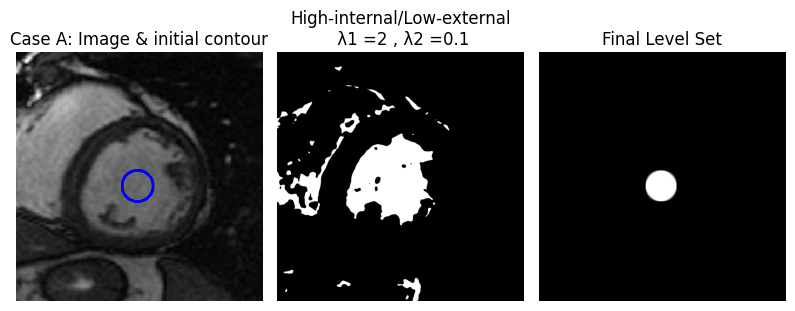

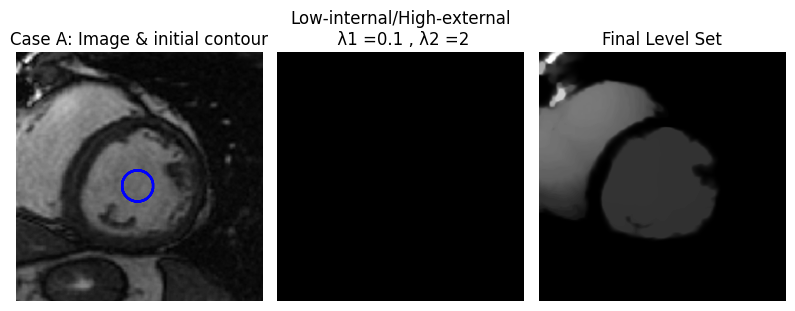

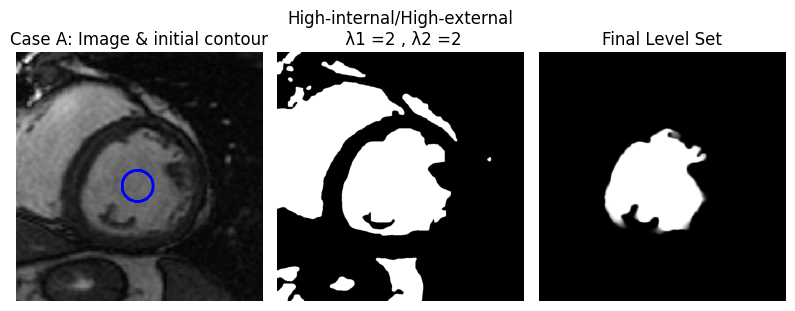

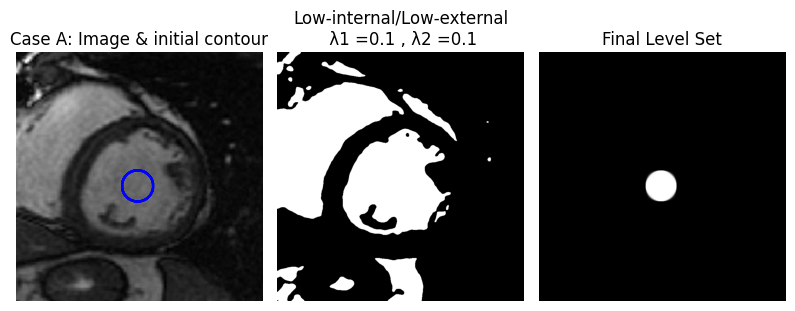

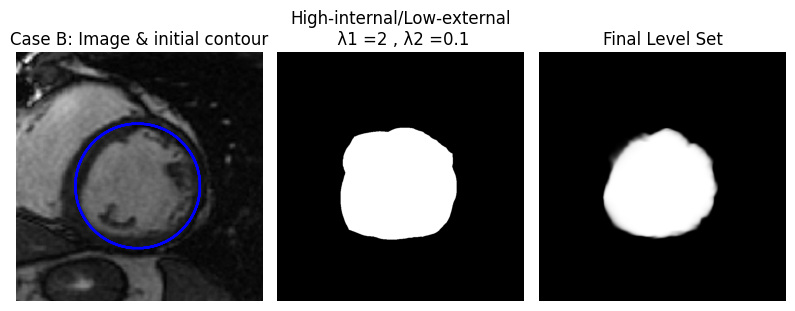

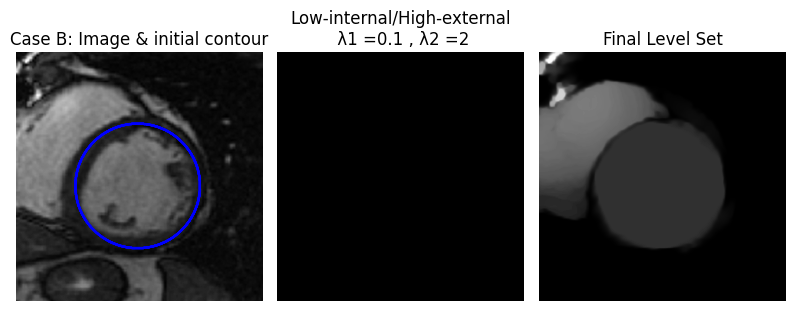

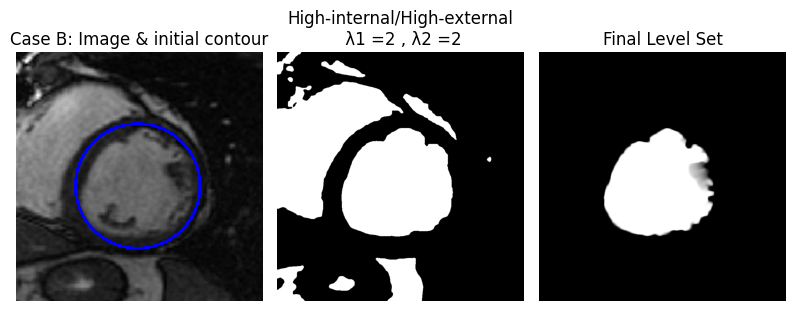

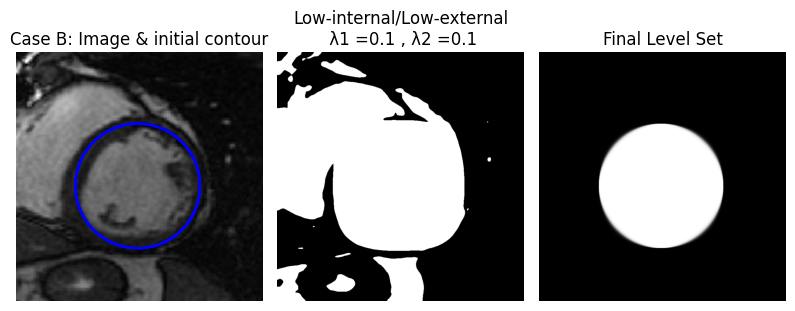

In [13]:
energy = {
    "High-internal/Low-external": [2,0.1],
    "Low-internal/High-external": [0.1,2],
    "High-internal/High-external": [2,2],
    "Low-internal/Low-external": [0.1,0.1],
}

Case_A = initial_contour_A , image_axial_thorax, "A"
Case_B = initial_contour_B , image_axial_thorax, "B"
Cases = [ Case_A, Case_B]



for case in Cases:
  for key, value in energy.items():
    lambda1, lambda2 = value
    initial_contour, image, idx= case
    cv = chan_vese(
      image,
      mu=0.2,
      lambda1=lambda1,
      lambda2=lambda2,
      tol=1e-4,
      max_num_iter=1000,
      dt=0.1,
      init_level_set=initial_contour,
      extended_output=True,
    )


    fig, axes = plt.subplots(1, 3, figsize=(8, 8))
    ax = axes.flatten()


    ax[0].imshow(image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].contour(initial_contour, colors='blue')
    ax[0].set_title(f"Case {idx}: Image & initial contour", fontsize=12)

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = f'{key}\n λ1 ={lambda1} , λ2 ={lambda2}'
    ax[1].set_title(title, fontsize=12)

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Final Level Set", fontsize=12)


    fig.tight_layout()
    plt.show()